## Company Bankruptcy Prediction

#### From Kaggle

#### Alex Martishius

In [7]:
#I'm going to try to continue to develop my neural network code here, and use it on this problem.
#First let's bring in the data.

#Packages
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from tabulate import tabulate
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
#working dir
os.chdir('C:\\Users\\alexm\\Desktop\\Kaggle')
#import data
raw_ds = pd.read_csv('data.csv')

In [3]:
raw_ds.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
raw_ds.columns
#Looks like all of the columns are relevant, don't need to drop any.

In [5]:
#Train/val/test split.
#split into X and y
y = raw_ds[['Bankrupt?']]
X = raw_ds.drop(columns=['Bankrupt?'])

#If we want train/validation/test, we need 2 calls to train_test_split
#This one splits into 80% train & 20% test.
Xtr, Xte, ytr, yte=train_test_split(X, y, test_size=0.2, random_state=218)
#This one splits into 80*75% train (60%) & 80*25% (20%) validation
Xtr, Xva, ytr, yva=train_test_split(Xtr, ytr, test_size=0.25, random_state=218)


In [6]:
#Shape of training set
print("Xtr shape:",Xtr.shape)
print("ytr shape:",ytr.shape)

#Shape of validaiton set
print("Xva shape:",Xva.shape)
print("yva shape:",yva.shape)

#Shape of testing set
print("Xte shape:",Xte.shape)
print("yte shape:",yte.shape)

Xtr shape: (4091, 95)
ytr shape: (4091, 1)
Xva shape: (1364, 95)
yva shape: (1364, 1)
Xte shape: (1364, 95)
yte shape: (1364, 1)


In [8]:
#Standardize data.

#We want to scale Xva and Xte by the Xtr scaling, so we don't accidentally "peek" at Xva and Xte.
scaler = preprocessing.StandardScaler().fit(Xtr)
tXtr = scaler.transform(Xtr)
tXva = scaler.transform(Xva)
tXte = scaler.transform(Xte)


In [12]:
pd.DataFrame(tXtr).describe()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
count,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,...,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4091.0,4.091000e+03
mean,1.181461e-15,6.126173e-16,-8.427627e-16,4.572241e-16,3.027264e-16,1.260334e-15,3.390763e-16,6.045930e-15,4.215237e-15,6.396359e-16,...,-1.362898e-15,-7.245895e-18,-5.439626e-15,5.633235e-15,-2.219876e-15,-3.156693e-15,2.696857e-19,-2.703196e-16,0.0,-3.311537e-17
std,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,...,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,0.0,1.000122e+00
min,-8.173873e+00,-8.408778e+00,-8.779744e+00,-3.185097e+01,-3.188582e+01,-5.953587e+01,-4.969317e+01,-4.738824e+01,-2.499818e+01,-4.897560e+01,...,-1.949357e+01,-5.289766e-02,-1.473216e+01,-3.185092e+01,-5.339691e+01,-5.080567e+00,-1.494386e+00,-5.130278e+01,0.0,-8.239989e-01
25%,-4.518991e-01,-3.399779e-01,-4.080029e-01,-3.942802e-01,-3.955257e-01,2.140537e-02,2.176692e-02,2.283641e-02,-1.590048e-02,2.239797e-02,...,-2.559800e-01,-5.289766e-02,-4.489781e-02,-3.941897e-01,-1.025191e-02,-2.237519e-01,-4.414859e-02,-5.547780e-03,0.0,-4.377886e-01
50%,-3.110244e-02,2.962309e-02,-8.660718e-03,-9.071922e-02,-9.030484e-02,2.458799e-02,2.667033e-02,2.661951e-02,-1.104551e-02,2.673583e-02,...,7.997406e-02,-5.289766e-02,-7.005143e-03,-9.072586e-02,5.779757e-02,-1.099782e-01,-4.317184e-02,3.116356e-03,0.0,-2.626829e-01
75%,4.998277e-01,4.476829e-01,4.815955e-01,3.172380e-01,3.150814e-01,2.893825e-02,3.383353e-02,3.220264e-02,-6.130846e-03,3.306664e-02,...,4.507300e-01,-5.289766e-02,3.761150e-02,3.172576e-01,1.302762e-01,5.318584e-02,-3.738796e-02,4.568446e-02,0.0,1.033597e-01
max,8.020877e+00,6.657801e+00,7.091133e+00,2.053897e+01,2.056228e+01,8.286017e-02,3.344573e+00,3.249173e+00,5.732497e+01,3.008815e+00,...,4.236569e+00,2.306249e+01,3.349139e+01,2.053908e+01,4.832914e+00,4.496213e+01,5.423629e+01,1.293556e+01,0.0,1.762686e+01


In [13]:
def perf_table(yhat,y,title="Model Performance"):
    f1 = f1_score(y,yhat)
    prec = precision_score(y,yhat)
    acc = accuracy_score(y,yhat)
    rec = recall_score(y,yhat)
    auc = roc_auc_score(y,yhat)

    model_stats = [title,acc,auc,prec,rec,f1]
    table_headers = ['Model','Accuracy','AUC','Precision','Recall','F1 Score']

    print(tabulate([model_stats], headers=table_headers, tablefmt='orgtbl'))
    return
    

In [17]:
#Let's try a little logistic regression for a benchmark first.
c=0.33
w = {0:12,1:88}

clf = LogisticRegression(penalty='l2',class_weight=w,C=c,solver='lbfgs',max_iter=1500).fit(tXtr, ytr)
ypreds = clf.predict(tXva)
perf_table(ypreds,yva,"Logistic")
#Not great - too many false positives. F1 score of 40%.

| Model    |   Accuracy |   AUC |   Precision |   Recall |   F1 Score |
|----------+------------+-------+-------------+----------+------------|
| Logistic |   0.940616 | 0.743 |    0.321429 | 0.529412 |        0.4 |


C:\Users\alexm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [124]:
#Neural Net Code:
#Helper functions for nn.
#NN-from-scratch functions;
#Helper Functions
def sigmoid(Z):
    """
    Returns the sigmoid of Z, broadcast.
    Requires numpy.
    Returns Z as a cache for backprop.
    """
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    """
    Returns the relu of Z, broadcast.
    Requires numpy.
    Returns Z as a cache for backprop.
    """
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    """
    Returns the derivative of relu.
    Requires numpy.
    Requires cache from forward relu step.
    """
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):
    """
    Returns the derivative of sigmoid.
    Requires numpy.
    Requires cache from forward sigmoid step.
    """
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ    

def initialize_parameters_deep(layers_dims,init):
    """
    Initializes the necessary weights and biases given the network shape.
    Current options are zeros - all zeros.  random - Ws between 0,0.1 and bs zeros. he - He. custom - pass a previously trained network.
    """
    initialization = init
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        if initialization=='zeros':
            parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization=='random':
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*0.1
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization=='he':
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization[0]=='custom':
            parameters=initialization[1]
        else:
            print('init method does not match known methods')
            return
    return parameters
            

def linear_forward(A, W, b):
    """
    Simple dot product for forward pass.
    """
    Z = W.dot(A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Brings back the A given your activation function.
    Currently the activation in all layers is the same.
    Until the final layer, then it is sigmoid for binary classification.
    """
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    """
    Implements forward activation via RELU until the final layer - then sigmoid.
    Bring back the caches required for backprop.
    """
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))      
    return AL, caches

def compute_cost(AL, Y):
    """
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    Returns:
    cost -- currently cross-entropy cost is the only option.
    """
    m = Y.shape[1]
    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    return cost

def linear_backward(dZ, cache):
    """
    Backprop of the dot product between W and b.
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Same format as linear_forward.  Dependent on activation function.
    """
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    """
    L = len(parameters) // 2 # number of layers in the neural networks
    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l+1)] = parameters['W'+str(l+1)]-(learning_rate*grads['dW'+str(l+1)])
        parameters["b" + str(l+1)] = parameters['b'+str(l+1)]-(learning_rate*grads['db'+str(l+1)])
        
    return parameters

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    """
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters['W'+str(l+1)].shape[0],parameters['W'+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters['b'+str(l+1)].shape[0],parameters['b'+str(l+1)].shape[1]))
        
    return v

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    """
    L = len(parameters) // 2 # number of layers in the neural networks
    # Momentum update for each parameter
    for l in range(L):
        # compute velocities
        v["dW" + str(l+1)] = (beta*v['dW'+str(l+1)])+((1-beta)*grads['dW'+str(l+1)])
        v["db" + str(l+1)] = (beta*v['db'+str(l+1)])+((1-beta)*grads['db'+str(l+1)])
        # update parameters
        parameters["W" + str(l+1)] = parameters['W'+str(l+1)]-(learning_rate*v['dW'+str(l+1)])
        parameters["b" + str(l+1)] = parameters['b'+str(l+1)]-(learning_rate*v['db'+str(l+1)])
        
    return parameters, v

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    """
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters['W'+str(l+1)].shape[0],parameters['W'+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters['b'+str(l+1)].shape[0],parameters['b'+str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters['W'+str(l+1)].shape[0],parameters['W'+str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters['b'+str(l+1)].shape[0],parameters['b'+str(l+1)].shape[1]))
    
    return v, s

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    """
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l+1)] = (beta1*v['dW'+str(l+1)])+((1-beta1)*grads['dW'+str(l+1)])
        v["db" + str(l+1)] = (beta1*v['db'+str(l+1)])+((1-beta1)*grads['db'+str(l+1)])

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-(beta1**t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-(beta1**t))

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l+1)] = (beta2*s['dW'+str(l+1)])+((1-beta2)*(grads['dW'+str(l+1)]**2))
        s["db" + str(l+1)] = (beta2*s['db'+str(l+1)])+((1-beta2)*(grads['db'+str(l+1)]**2))

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-(beta2**t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-(beta2**t))

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(learning_rate*(v_corrected['dW'+str(l+1)]/np.sqrt(s_corrected['dW'+str(l+1)]+epsilon)))
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(learning_rate*(v_corrected['db'+str(l+1)]/np.sqrt(s_corrected['db'+str(l+1)]+epsilon)))

    return parameters, v, s




def update_parameters(parameters, grads, learning_rate,kind='gd',extras=[]):
    """
    GD, momentum, or ADAM.
    If momentum then extras is expected to be [v,beta]
    If ADAM then extras is expected to be [v,s,t,beta1,beta2,epsilon]
    """
    if kind=='gd':
        parameters_upd = update_parameters_with_gd(parameters, grads, learning_rate)
        return parameters_upd
    if kind=='momentum':
        parameters_upd,v = update_parameters_with_momentum(parameters, grads, extras[0], extras[1], learning_rate)
        return parameters_upd,v
    if kind=='adam':
        parameters_upd,v,s = update_parameters_with_adam(parameters, grads, extras[0], extras[1], extras[2], learning_rate,
                                extras[3], extras[4],  extras[5])
        return parameters_upd,v,s

def predict(X, y, parameters,threshold=0.5):
    """
    Takes X and y to give you instant feedback on accuracy.
    Classification threshold can be adjusted- but more training is recommended instead.
    """
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > threshold:
            p[0,i] = 1
        else:
            p[0,i] = 0
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    return p
    
    #Model Function
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False,dynamic_lr=False,init='random',opt=['gd']):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    dynamic_lr -- if True, learning rate decays every 20%
    init -- 'zeros','random',or'he'
    opt -- expected to be an array : ['gd'],['momentum',beta], or ['adam',t,beta1,beta2,epsilon]
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims,init)
    
    #Initialize the optimizer
    if opt[0] == "gd":
        pass # no initialization required for gradient descent
    elif opt[0] == "momentum":
        v = initialize_velocity(parameters)
        beta = opt[1]
    elif opt[0] == "adam":
        v, s = initialize_adam(parameters)
        t = opt[1]
        beta1 = opt[2]
        beta2 = opt[3]
        epsilon = opt[4]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        #Dynamic Learning Rate:
        if dynamic_lr ==True:
            if float(num_iterations)*0.2==i:
                learning_rate=learning_rate*0.7
                print("LR reduced 1x")
            if float(num_iterations)*0.4==i:
                learning_rate=learning_rate*0.8
                print("LR reduced 2x")
            if float(num_iterations)*0.6==i:
                learning_rate=learning_rate*0.9
                print("LR reduced 3x")
            if float(num_iterations)*0.8==i:
                learning_rate=learning_rate*0.95
                print("LR reduced 4x")

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        if opt[0] == "gd":
            parameters = update_parameters(parameters, grads, learning_rate,'gd')
        elif opt[0] == "momentum":
            parameters,v = update_parameters(parameters, grads, learning_rate,'momentum',[v,beta])
        elif opt[0] == "adam":
            t = t+1
            parameters,v,s = update_parameters(parameters, grads, learning_rate,'adam',[v,s,t,beta1,beta2,epsilon])
        
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters



In [21]:
print(tXtr.shape)
print(ytr.shape)

(4091, 95)
(4091, 1)


In [24]:
nnXtr = np.array(tXtr.T)
nnytr = np.array(ytr.T)
print(nnXtr.shape)
print(nnytr.shape)

(95, 4091)
(1, 4091)


Cost after iteration 0: 0.700278
Cost after iteration 100: 0.676925
Cost after iteration 200: 0.654972
Cost after iteration 300: 0.634292
Cost after iteration 400: 0.614767
Cost after iteration 500: 0.596296
Cost after iteration 600: 0.578795
Cost after iteration 700: 0.562188
Cost after iteration 800: 0.546413
Cost after iteration 900: 0.531414


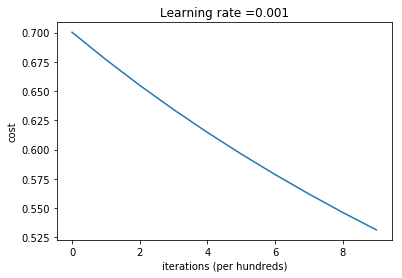

In [25]:
layers_dims = [95, 50, 25, 10, 1]
param_nn1 = L_layer_model(nnXtr,nnytr,layers_dims,learning_rate = 0.001, num_iterations = 1000, print_cost=True,init='random',opt=['gd'])
#Works!

Cost after iteration 0: 0.700278
Cost after iteration 100: 0.678919
Cost after iteration 200: 0.656793
Cost after iteration 300: 0.635958
Cost after iteration 400: 0.616297
Cost after iteration 500: 0.597703
Cost after iteration 600: 0.580092
Cost after iteration 700: 0.563384
Cost after iteration 800: 0.547519
Cost after iteration 900: 0.532435


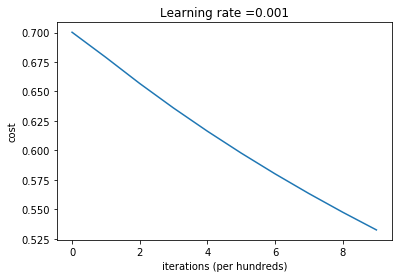

In [118]:
param_nn1 = L_layer_model(nnXtr,nnytr,layers_dims,learning_rate = 0.001, num_iterations = 1000, print_cost=True,init='random',opt=['momentum',0.9])
#Works!

Cost after iteration 0: 0.700278
Cost after iteration 100: 0.679193
Cost after iteration 200: 0.645396
Cost after iteration 300: 0.560146
Cost after iteration 400: 0.411881
Cost after iteration 500: 0.272730
Cost after iteration 600: 0.188381
Cost after iteration 700: 0.144143
Cost after iteration 800: 0.117683
Cost after iteration 900: 0.100611


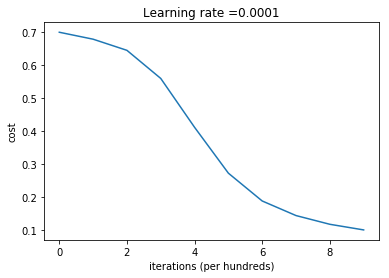

In [126]:
param_nn1 = L_layer_model(nnXtr,nnytr,layers_dims,learning_rate = 0.0001, num_iterations = 1000, print_cost=True,init='random',opt=['adam',0,.9,.999,1e-8])
#Wowza!

In [128]:
#In-sample performance of ADAM:
predictions_test = predict(nnXtr, nnytr, param_nn1)
ypreds=predictions_test.T
print(ypreds.shape)
print(Xtr.shape)

Accuracy: 0.9731117086286976
(4091, 1)
(4091, 95)


In [129]:
perf_table(ypreds,ytr,"ADAM - IS")

| Model     |   Accuracy |      AUC |   Precision |    Recall |   F1 Score |
|-----------+------------+----------+-------------+-----------+------------|
| ADAM - IS |   0.973112 | 0.541891 |    0.909091 | 0.0840336 |   0.153846 |


Cost after iteration 0: 0.089138
Cost after iteration 100: 0.087516
Cost after iteration 200: 0.086056
Cost after iteration 300: 0.084735
Cost after iteration 400: 0.083533
Cost after iteration 500: 0.082428
Cost after iteration 600: 0.081401
Cost after iteration 700: 0.080439
Cost after iteration 800: 0.079535
Cost after iteration 900: 0.078681


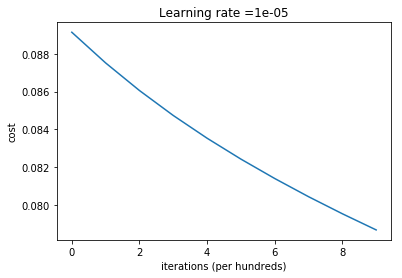

In [130]:
#It predicts too many bankruptcies but ADAM works! Let's try and train it some more.
saved = param_nn1
param_nn1 = L_layer_model(nnXtr,nnytr,layers_dims,learning_rate = 0.00001, num_iterations = 1000, print_cost=True,init=['custom',param_nn1],opt=['adam',0,.9,.999,1e-8])

Cost after iteration 0: 0.077874
Cost after iteration 100: 0.076992
Cost after iteration 200: 0.076190
Cost after iteration 300: 0.075445
Cost after iteration 400: 0.074750
Cost after iteration 500: 0.074096
Cost after iteration 600: 0.073476
Cost after iteration 700: 0.072884
Cost after iteration 800: 0.072320
Cost after iteration 900: 0.071774


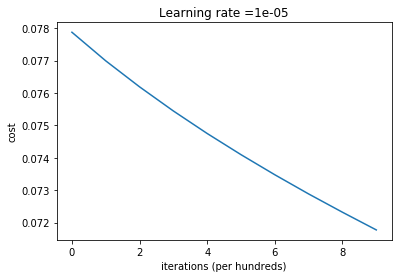

In [131]:
saved = param_nn1
param_nn2 = L_layer_model(nnXtr,nnytr,layers_dims,learning_rate = 0.00001, num_iterations = 1000, print_cost=True,init=['custom',param_nn1],opt=['adam',0,.9,.999,1e-8])

Cost after iteration 0: 0.071246
Cost after iteration 100: 0.070690
Cost after iteration 200: 0.070164
Cost after iteration 300: 0.069663
Cost after iteration 400: 0.069179
Cost after iteration 500: 0.068711
Cost after iteration 600: 0.068251
Cost after iteration 700: 0.067796
Cost after iteration 800: 0.067354
Cost after iteration 900: 0.066926
Cost after iteration 1000: 0.066506
Cost after iteration 1100: 0.066094
Cost after iteration 1200: 0.065692
Cost after iteration 1300: 0.065311
Cost after iteration 1400: 0.064939
Cost after iteration 1500: 0.064574
Cost after iteration 1600: 0.064215
Cost after iteration 1700: 0.063860
Cost after iteration 1800: 0.063514
Cost after iteration 1900: 0.063177
Cost after iteration 2000: 0.062845
Cost after iteration 2100: 0.062518
Cost after iteration 2200: 0.062197
Cost after iteration 2300: 0.061875
Cost after iteration 2400: 0.061554
Cost after iteration 2500: 0.061231
Cost after iteration 2600: 0.060911
Cost after iteration 2700: 0.060592
Cost

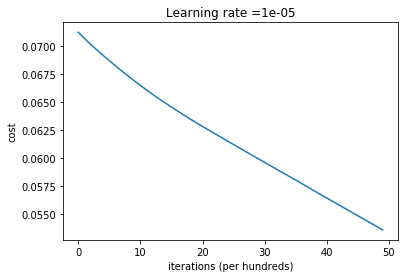

In [132]:
#Trying more iterations
saved = param_nn2
param_nn3 = L_layer_model(nnXtr,nnytr,layers_dims,learning_rate = 0.00001, num_iterations = 5000, print_cost=True,init=['custom',param_nn2],opt=['adam',0,.9,.999,1e-8])

In [133]:
predictions_test = predict(nnXtr, nnytr, param_nn3)
ypreds=predictions_test.T
perf_table(ypreds,ytr,"ADAM - IS")

Accuracy: 0.9802004399902229
| Model     |   Accuracy |      AUC |   Precision |   Recall |   F1 Score |
|-----------+------------+----------+-------------+----------+------------|
| ADAM - IS |     0.9802 | 0.720801 |    0.779412 | 0.445378 |   0.566845 |


In [135]:
#Not great, but at least better than the logistic regression.
#Maybe we can try to tune the classification threshold;
nnXva = np.array(tXva.T)
nnyva = np.array(yva.T)
print(nnXva.shape)
print(nnyva.shape)
predictions_test = predict(nnXva, nnyva, param_nn3)
ypreds=predictions_test.T
perf_table(ypreds,yva,"ADAM - VA")

(95, 1364)
(1, 1364)
Accuracy: 0.9670087976539592
| Model     |   Accuracy |      AUC |   Precision |   Recall |   F1 Score |
|-----------+------------+----------+-------------+----------+------------|
| ADAM - VA |   0.967009 | 0.605939 |      0.6875 | 0.215686 |   0.328358 |


In [ ]:
best_f = 0
best_thresh = None
for i in range(100):
    predictions_test = predict(nnXva, nnyva, param_nn3,threshold=float(i)/100)
    yhat=predictions_test.T
    f = f1_score(yva,yhat)
    if f>best_f:
        best_f = f
        best_thresh = i
    

In [137]:
print(best_f)
print(best_thresh)

0.41726618705035967
9


In [138]:
predictions_test = predict(nnXva, nnyva, param_nn3,threshold=0.09)
ypreds=predictions_test.T
perf_table(ypreds,yva,"ADAM - VA")

Accuracy: 0.9406158357771263
| Model     |   Accuracy |      AUC |   Precision |   Recall |   F1 Score |
|-----------+------------+----------+-------------+----------+------------|
| ADAM - VA |   0.940616 | 0.761846 |    0.329545 | 0.568627 |   0.417266 |


In [139]:
#Does the threshold tuning work on testing set?
nnXte = np.array(tXte.T)
nnyte = np.array(yte.T)
print(nnXte.shape)
print(nnyte.shape)
predictions_test = predict(nnXte, nnyte, param_nn3,threshold=0.09)
ypreds=predictions_test.T
perf_table(ypreds,yva,"ADAM - TE")
#No.  do we have anything with default threshold?

(95, 1364)
(1, 1364)
Accuracy: 0.9332844574780061
| Model     |   Accuracy |      AUC |   Precision |    Recall |   F1 Score |
|-----------+------------+----------+-------------+-----------+------------|
| ADAM - TE |   0.898827 | 0.504562 |   0.0421053 | 0.0784314 |  0.0547945 |


In [140]:
predictions_test = predict(nnXte, nnyte, param_nn3,threshold=0.50)
ypreds=predictions_test.T
perf_table(ypreds,yva,"ADAM - TE")

Accuracy: 0.9648093841642231
| Model     |   Accuracy |      AUC |   Precision |    Recall |   F1 Score |
|-----------+------------+----------+-------------+-----------+------------|
| ADAM - TE |   0.946481 | 0.501045 |   0.0416667 | 0.0196078 |  0.0266667 |


In [ ]:
#no.  Looks like we need a better NN algorithm.  But in this iteration we did get Momentum and ADAM working.